# Assignment 1 - Oil Painting Filter

## Task 1 - Combining Colour Bands

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

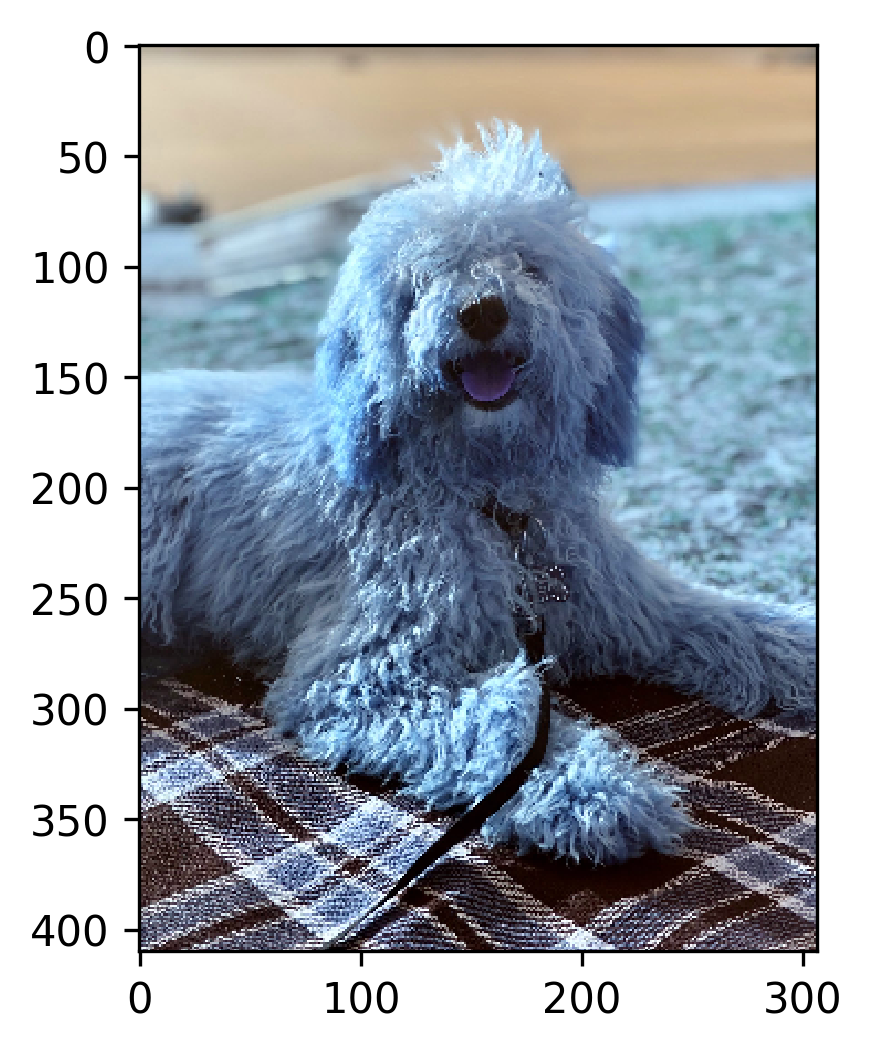

In [14]:
dog_img = cv2.imread("img/dog.jpg")
dog_img = cv2.resize(dog_img,None,fx=0.2,fy=0.2)

plt.imshow(dog_img)

Images are by default BGR.

We want 0.114 B, 0.587 G and 0.299 R.

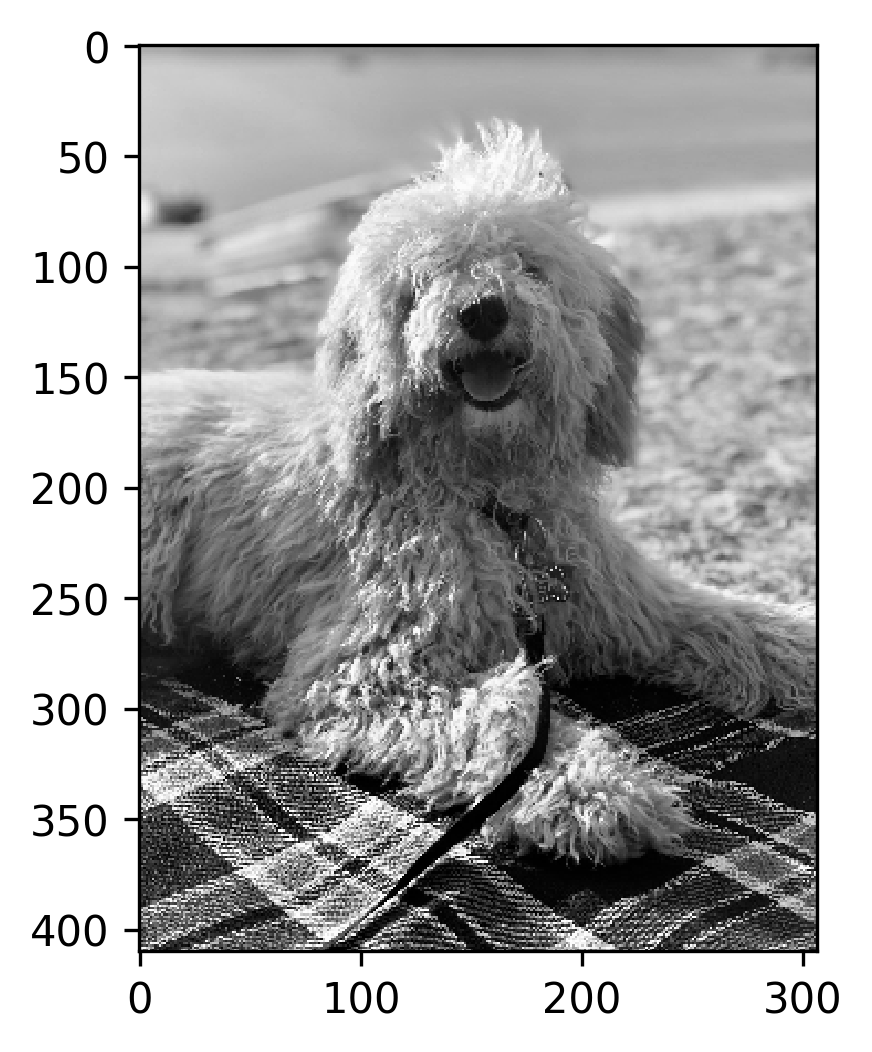

In [16]:
def make_gray(img):
    return img[:,:,0] * 0.114 + img[:,:,1] * 0.587 + img[:,:,2] * 0.299

dog_img_gray = make_gray(dog_img)
plt.imshow(dog_img_gray, cmap='gray', vmin=0, vmax=255)

## Task 2

In [8]:
from collections import Counter

def mode_filter(im_gray, radius):
    img = np.copy(im_gray)
    h, w = np.shape(img)

    img_padded = np.pad(img, radius, mode='wrap')

    for row in range(h):
        for col in range(w):
            # look in the local neighbourhood
            roi = img_padded[row:row+2*radius,col:col+2*radius].flatten()
            
            # find the most common pixel
            freq = Counter(roi)
            pixel_value = freq.most_common(1)[0][0]
            img[row, col] = pixel_value

    return img

In [9]:
%prun filtered_3 = mode_filter(dog_img_gray, 3)
%prun filtered_7 = mode_filter(dog_img_gray, 7)
%prun filtered_11 = mode_filter(dog_img_gray, 11)

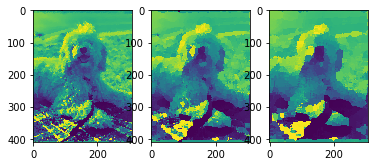

In [10]:
fig, axes = plt.subplots(1,3)
axes[0].imshow(filtered_3)
axes[1].imshow(filtered_7)
axes[2].imshow(filtered_11)

In [35]:
def oil_filter(img_orig, radius):
    im_gray = make_gray(img_orig)
    oil_image = np.copy(img_orig)
    
    h, w = im_gray.shape
    
    J = mode_filter(im_gray, radius)
    J_padded = np.pad(J, radius, mode='wrap')
    
    for row in range(h):
        for col in range(w):
            # look in the local neighbourhood
            roi = J_padded[row:row+2*radius,col:col+2*radius]
            
            matching = np.where(roi == J[row,col], 1, 0)
            b_roi = oil_image[row:row+2*radius,col:col+2*radius]
            
            b_matching = np.bitwise_and(b_roi, matching)
            
            print(b_matching)
            break
            oil_image[row,col] = (0,0,0)
        break
            
    return oil_image
            
    
    
    
    

In [36]:
plt.imshow(oil_filter(dog_img, 5))

ValueError: operands could not be broadcast together with shapes (10,10,3) (10,10) 